In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats as smstats

import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt

# Inferential Statistics

Inferential statistics involves drawing conclusions about a population from a sample. 

A sample **statistic** is a quantity calculated from the sample values. Typical notation is $\bar{x}$ for the sample mean, $s$ for the sample standard deviation. The goal of inferential statistics is to estimate values for parameters of the population, such as its mean $\mu$ and its standard deviation $\sigma$. 

Suppose we draw a sample of size $n$. The particular set of values obtained are denoted $x_1, x_2 \cdots x_n$. These are particular realizations of the random variables $X_1, X_2 \cdots X_n$. We have a **random sample** if they are independent of each other and identically distributed (iid). 



## Central Limit theorem
If $X_1, X_2 \cdots X_n$ are independent, identically distributed random variables with finite mean and variance $\mu$ and $\sigma^2$, and $S_n = \sum_{i=1}^n X_i$, then the quantity $\frac{S_n-n\mu}{\sigma\sqrt{n}}$ has a normal distribution asymptotically.
$$
\lim_{n \to \infty} \frac{S_n-n\mu}{\sigma\sqrt{n}}\; \sim \; N(0,1)
\implies \lim_{n \to \infty} P\left(a \le \frac{S_n-n\mu}{\sigma\sqrt{n}} \le b \right) = \frac{1}{\sqrt{2\pi}} \int_a^b e^{-\frac{u^2}{2}} du
$$

**Proof**

Let $Z_i = \frac{X_i-\mu}{\sigma\sqrt(n)},\quad \sum Z_i = \frac{S_n-n\mu}{\sigma\sqrt{n}}$ and note first that
$$
M_{\sum Z_i}(t) = E(e^{t\sum Z_i}) = E(e^{tZ_1}e^{tZ_2} \cdots e^{tZ_n}) = E(e^{tZ_1})E(e^{tZ_2}) \cdots E(e^{tZ_n}) = [ M_{Z_1}(t) ]^n
$$
because the $Z_i$ are independent. Now,
$$
\begin{split}
M_{Z_1}(t) &= E(e^{tZ_1}) = E\left(1 + tZ_1  +\frac{t^2Z_1^2}{2!} + \frac{t^3Z_1^3}{3!}+\cdots\right)\\
&= 1 + tE(Z_1) + \frac{t^2E(Z_1^2)}{2!} + \frac{t^3E(Z_1^3)}{3!}+\cdots
\end{split}
$$
But $E(Z_1) = 0, \; E(Z_1^2) = \frac{1}{n}, \; E(Z_1^3)=\frac{1}{n^{\frac{3}{2}}}E\left(\frac{(X_1-\mu)^3}{\sigma^3}\right)$ and so on. This means that
$$
\lim_{n \to \infty}[ M_{Z_1}(t) ]^n =  \lim_{n \to \infty} \left(1+\frac{1}{n} \frac{t^2}{2!} + \frac{1}{n^{\frac{3}{2}}}E\left(\frac{(X_1-\mu)^3}{\sigma^3}\right) + \cdots \right)^n
$$

Here, we make the crucial observation that terms with powers of $n$ in the denominator greater than 1 in this expression go to zero as $n \to \infty$. So,
$$
\lim_{n \to \infty} [ M_{Z_1}(t) ]^n = \lim_{n \to \infty} \left(1+\frac{1}{n} \frac{t^2}{2} \right)^n = e^{\frac{t^2}{2}}
$$
which is the moment generating function of a standard normal distribution. From the uniqueness of moment generating functions, this implies that 
$$
\frac{S_n-n\mu}{\sigma\sqrt{n}} \text{  is distributed normally as  } n \to \infty
$$
$$\tag*{$\blacksquare$}$$

This is a powerful theorem because it says that if we have enough variables from an arbitrary distribution, their sum will be distributed normally.

## Estimators
A function $g(X_1, X_2 \cdots X_n)$ designed to estimate a population parameter is called an **estimator**. For example, the function
$$
g(X_1, X_2 \cdots X_n) = \bar{X} = \frac{1}{n}\sum_{i=1}^n X_i
$$
is an estimator for $\mu$. Note that we could choose some other function as an estimator: a trimmed mean or a median are examples. The value computed from a particular sample is the **estimate**, and is denoted by a hat over the parameter. For example, an estimate of $\mu$ is $\hat{\mu}$.

### Bias and Variance of estimators
Estimator functions are designed to estimate population parameters. Given a choice among estimators, we can develop criteria to select the best one among them. The main criteria are bias and efficiency. For an estimator function $g$ designed to estimate the population parameter $\theta$,

$$
\begin{split}
\text{Bias} &\equiv E(g) - \theta \\
\text{var}(g) &\equiv E\left[(g-E(g))^2\right]
\end{split}
$$

where the expectations are taken over all samples from the population. Clearly, we prefer estimators with low or zero bias and small variance.

#### Mean Squared Error

A metric that incorporates both estimator bias and variance is the mean squared error (MSE). For a given estimator $g(X_1,X_2,\cdots X_n)$ and population parameter $\theta$,

$$
MSE \equiv E\left[(g-\theta)^2\right] = E\left[g^2 - 2 \theta g + \theta^2\right] = E(g^2) -2\theta E(g) + \theta^2 
$$

Now, for any random variable $Y, E(Y^2) = \text{var}(Y) + E(Y)^2$. So,

$$
\begin{split}
MSE &= E(g^2) -2\theta E(g) + \theta^2\\ 
&= [E(g)^2 + \text{var}(g)]-2\theta E(g)] + \theta^2\\
&= [E(g) - \theta]^2 + \text{var}(g)
\end{split}
$$


### Estimator for population mean $\mu$

Each of the random variables $X_i$ has an expected value $\mu$ and variance $\sigma^2$. We could pick one of them, say $X_1$, as our estimator for the mean. We will then have an unbiased estimator with variance $\sigma^2$. However, it is possible to pick a better estimator, the sample mean $\bar{X} = \frac{1}{n}\sum X_i$. The sample mean is unbiased, but more importantly, it is more **efficient** because it has a lower standard deviation:

\begin{equation}
E(\bar{X}) = E\left[\frac{1}{n}\sum_{i=1}^n X_i\right] = \frac{1}{n}\sum_{i=1}^n E(X_i) = \frac{1}{n}\; n\mu = \mu \end{equation}

\begin{align}
\text{var}(\bar{X}) &= \frac{1}{n^2}\text{var}\sum X_i = \frac{1}{n^2} \sum\text{var}( X_i) +\sum_{i<j} 2 \text{cov}(X_i,X_j) \nonumber \\
 &= \frac{1}{n^2} \sum\text{var} (X_i) = \frac{1}{n^2}\; n\sigma^2 = \frac{\sigma^2}{n}
\end{align}

Here, we have used the fact that $\text{cov}(X_i,X_j) = 0\; \forall\; i,j$ since the $\{X_i\}$ are all independent of each other.



### Estimator for population variance $\sigma^2$
Let $g(X_1,X_2,\cdots X_n) = \sum (X_i - \bar{X})^2$. Then

$$
\begin{split}
g &= \sum (X_i^2 -2\bar{X}X_i + \bar{X}^2) = \sum X_i^2 -2n\bar{X}^2 + n \bar{X}^2 = \sum X_i^2 - n \bar{X}^2\\
  \\
E(g) &= \sum E(X_i^2) - n E(\bar{X}^2)
\end{split}
$$

We now use the fact that for any random variable $Y, E(Y^2) = \text{var}(Y) + E(Y)^2$. So,
$$
\begin{split}
E(g)&= \sum(\sigma^2 + \mu^2) - n\left(\frac{\sigma^2}{n}+\mu^2\right)\\
&= n(\sigma^2 + \mu^2) - (\sigma^2 + n\mu^2)\\
&= (n-1)\sigma^2
\end{split}
$$

This implies that the sum of squared deviations from the mean is a biased estimator of the population variance. However, this is easily fixed. The **sample variance**, $s^2$, defined as
\begin{equation}
s^2 \equiv \frac{1}{n-1} \sum_{i=1}^n (X_i-\bar{X})^2
\end{equation}
gives us an unbiased estimator of the population variance $\sigma^2$.


## Sampling distributions

As seen above, estimators are random variables whose values vary from sample to sample. The distributions corresponding to estimators are known as **sampling distributions**. Knowing the sampling distribution of an estimator allows us to draw conclusions about population parameters.

### Distribution of the sample mean
First, consider the case when the **population is normal**, which implies that $X_i \sim N(\mu,\sigma^2)$ for all $i$. We proceed by considering moment generating functions. For $X \sim N(\mu,\sigma^2)$, the moment generating function $M_{X}(t) \equiv E\left(e^{tX}\right) = e^{\mu t + \sigma^2\frac{t^2}{2}}$. This function in unique.

The moment generating function for $\bar{X}$ is given by

$$
M_{\bar{X}}(t) = E\left(e^{t\sum\frac{X_i}{n}}\right)
= E\left(e^{t\frac{X_1}{n}}\dot  e^{t\frac{X_2}{n}}\cdots e^{t\frac{X_n}{n}} \right)
= E\left(e^{t\frac{X_1}{n}}\right)E\left(e^{t\frac{X_2}{n}}\right) \cdots E\left(e^{t\frac{X_n}{n}}\right)
$$

where the last equality follows from the fact that the ${X_i}$ are independent of each other.
$$
\begin{split}
M_{\bar{X}}(t) &= \Pi_{i=1}^n M_X(t/n)\\
&= \Pi_{i=1}^n e^{\mu \frac{t}{n} + \frac{\sigma^2}{n^2}\frac{t^2}{2}}\\
&= e^{\sum_{i=1}^n \mu \frac{t}{n} + \frac{\sigma^2}{n^2}\frac{t^2}{2}}\\
&= e^{\mu t + \frac{\sigma^2}{n}\frac{t^2}{2}}
\end{split}
$$

This implies that
$$
\boxed{
\bar{X} \sim N(\mu,\frac{\sigma^2}{n}), \;\text{population normal}
}
$$

In case the **population is not normal**, we use the central limit theorem, from which we get
$$
\lim_{n\to\infty} P\left(a \le \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \le b\right) = \frac{1}{\sqrt{2\pi}} \int_a^b e^{-\frac{u^2}{2}du}
$$
In other words,
$$
\boxed{
Z=\frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \;\text{ is normally distributed as } n \to \infty \text{ for a non-normal population}
}
$$

In many cases, the population variance is unknown. In that case we are forced to use a sample estimate of the population variance. To this end, note that
$$
\frac{\bar{X}-\mu}{s/\sqrt{n}} = \frac{\bar{X}-\mu}{\frac{s}{\sigma}\;\frac{\sigma}{\sqrt{n}}} = \frac{(\bar{X}-\mu) / (\sigma/\sqrt{n})}{\sqrt{s^2/\sigma^2}}
$$

The numerator of the last quantity is a standard normal variable. As shown below, the denominator is a $\chi^2_{n-1}$ variable divided by its degrees of freedom, $(n-1)$. This implies that the whole quantity has a t distribution with $(n-1)$ degrees of freedom

$$
\boxed{
\frac{\bar{X}-\mu}{s/\sqrt{n}}\; \text{ is t distributed with } (n-1) \text{ degrees of freedom, population normal}
}
$$


### Distribution of the sample variance
Assume that the population is normal, with finite mean $\mu$ and variance $\sigma^2$. Now,
$$
\begin{split}
\sum (X_i-\mu)^2 &= \sum\left( X_i-\bar{X}+\bar{X}-\mu \right)^2\\
&= \sum (X_i-\bar{X})^2 + \sum (\bar{X}-\mu)^2 + 2 \sum (X_i-\bar{X})(\bar{X}-\mu)\\
&= \sum (X_i-\bar{X})^2 + n (\bar{X}-\mu)^2 + 2 (\bar{X}-\mu)\sum(X_i-\bar{X})
\end{split}
$$
Now, since $\sum(X_i-\bar{X}) = 0$, we have
$$
\sum (X_i-\mu)^2 = \sum (X_i-\bar{X})^2 + n (\bar{X}-\mu)^2
$$
Dividing throughout by $\sigma^2$,
$$
\sum \left(\frac{X_i-\mu}{\sigma}\right)^2 = \sum \frac{(X_i-\bar{X})^2}{\sigma^2} + \left(\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\right)^2
$$
We can rewrite this as
$$
\sum Z_i^2 = \frac{(n-1)s^2}{\sigma^2} + Z_{\bar{X}}^2
$$
The $Z_i$ are all standard normal variables, and so is $Z_{\bar{X}}$, because we are assuming that the population is normal.

Let $Q = \sum Z_i^2, R = \frac{(n-1)s^2}{\sigma^2}, S = Z_{\bar{X}}^2$, and note that
$$
Q \sim \chi_n^2, \qquad S \sim \chi_1^2
$$
since the sum of $n$ squared standard normal variables is $\chi_n^2$ distributed.

Now, for independent random variables $R, S$ and $Q=R+S$, the moment generating functions can be written as:
$$
M_Q(t) = E(e^{tQ}) = E(e^{tR}e^{tS}) = E(e^{tR}) E(e^{tS}) = M_R(t) M_S(t) \implies M_R(t) = \frac{M_Q(t)}{M_S(t)}
$$
Since
$$
M_Q(t) = \left(1-2t\right)^{-\frac{n}{2}} \text{  and  } M_S(t) = \left(1-2t\right)^{-\frac{1}{2}}
$$
we get $M_R(t) = \left(1-2t\right)^{-\frac{n-1}{2}}$.

Since the moment generating function is unique,
$$
\boxed{
\frac{(n-1)s^2}{\sigma^2} \sim \chi_{n-1}^2, \; \text{population normal}
}
$$




### Distribution of sample proportion
Suppose that the population consists of individuals with a characteristic that is a Bernoulii distributed random variable $X \in \{0,1\}$ with

$$ 
    P[X=1] = \pi \qquad P[X=0] = 1-\pi \qquad \mu = \pi \qquad \sigma^2 = \pi(1-\pi) 
$$
    
We draw a sample of size $n$, obtaining random variables $X_1, X_2 \cdots X_n$, and define the sample proportion $p$
$$
p \equiv \bar{X} = \frac{X_1+X_2+\cdots+X_n}{n}
$$

Since the $X_i$ are iid,
$$
\begin{split}
E(p) &= \pi \\
\sigma^2_p &= \frac{\sigma^2}{n} =\frac{\pi(1-\pi)}{n}  \\
\end{split}
$$
Note that $p$ can only take on discrete values $k/n$, where $0\le k\le n$. Now, with $c=np$, the sample count,
$$
P [X_1+X_2 \cdots X_n = c] = \binom{n}{c}\; \pi^c\; (1-\pi)^{n-c}
$$

Using the Cenrtral Limit Theorem, we know that 
$$
\lim_{n\to\infty} P\left(a \le \frac{\bar{X}-\pi}{\sigma/\sqrt{n}} \le b\right) = \frac{1}{\sqrt{2\pi}} \int_a^b e^{-\frac{u^2}{2}du}
$$

or, in other words, the random variable

$$
Z=\frac{p-\pi}{\sqrt{\frac{\pi(1-\pi)}{n}}}
$$

is asymptotically normal. This is actually a statement that the Binomial distribution is asymptotically normal. Often, textbooks suggest a rule of thumb that this approximation can be used if the conditions $n\pi \ge 10$ and $n(1-\pi) \ge 10$ are met.

## Interval estimation

Sample statistics are point estimates of population parameters, since they give us one number as an estimate. If we know the sampling distribution of the statistic, we can calculate a range within which the population parameter falls with a pre-specified probability. 

### Population mean
Suppose that we have a sample mean and we seek a range for the population mean with 95% probability. Since the population is normal, we know that the sampling distribution of the mean will be normal. This implies that
$$
P \left(-z_{0.025} \le \frac{\bar{X}-\mu}{\sigma\sqrt{n}} \le z_{0.025} \right) = 0.95
$$
or, in general,
$$
P \left(-z_{\alpha/2} \le \frac{\bar{X}-\mu}{\sigma\sqrt{n}} \le z_{\alpha/2} \right) = (1-\alpha)
$$
Here $\alpha$ is known as the **level of significance**, $(1-\alpha)$ is called the **confidence level**, and $z_{\alpha/2}$ is the point beyond which the area under the standard normal curve is $\alpha/2$.

The **confidence interval** for the population mean results from inverting the inequalities

$$
\bar{X}-z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \le \mu \le \bar{X}+z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\quad \text{with confidence level } (1-\alpha), \text{ for a normal population}
$$

As is generally the case, if the population variance is unknown, we use the sample variance and critical values for the t distribution with $(n-1)$ degrees of freedom.

$$
\boxed{
\bar{X}-t_c\frac{s}{\sqrt{n}} \le \mu \le \bar{X}+t_c\frac{s}{\sqrt{n}}\quad \text{with confidence level } (1-\alpha), \text{ for a normal population}
}
$$

The critical value $t_c$ is given by
$$
P(T_{n-1} \le t_c) = 1-\frac{\alpha}{2}
$$


In [3]:
# Interval estimation of population mean assuming normally distributed population

np.random.seed(12345)
n=10
v1 = stats.norm.rvs(size=n)  # Standard normal random variates

xbar = np.mean(v1)
s = np.std(v1, ddof=1)    # ddof=1 uses (n-1) for the denominator, so gives us sample sd
xbar

ConfLevel = 0.95
alpha = 1 - ConfLevel     # Level of significance

tc = stats.t.ppf(1-alpha/2,n-1) # critical value; P(-\infty,tc) = prob in right tail = 1-alpha/2
tc
xbar-tc*s/np.sqrt(n),xbar+tc*s/np.sqrt(n)

smstats.weightstats._tconfint_generic(xbar,s/np.sqrt(n),n-1,alpha,alternative="2-sided") # Single function call

0.4948364398216353

2.2621571627409915

(-0.11029681585827622, 1.0999696955015468)

(-0.11029681585827622, 1.0999696955015468)

### Population variance

For a normal population, $\frac{(n-1)s^2}{\sigma^2} \sim \chi^2_{n-1}$. The $\chi^2$ density is not symmetric and so the left and right critical values for a given confidence level are arbitrary, to some extent. One way to pick specific critical values is to search for the values that lead to the smallest interval, but the convention is just to pick the values that lead to the same remaining probability on either side of the range. Thus, with
$$
P\left(c_1 \le \frac{(n-1)s^2}{\sigma^2} \le c_2 \right) = 1-\alpha
$$
$c_1$ and $c_2$ are chosen such that
$$
P(\chi^2_{n-1} \le c_1) = \frac{\alpha}{2} \quad P(\chi^2_{n-1} \ge c_2) = \frac{\alpha}{2}
$$
This yields
$$
\boxed{
\frac{(n-1) s^2}{c_2} \le \sigma^2 \le \frac{(n-1) s^2}{c_1}\quad \text{with confidence level } (1-\alpha), \text{ for a normal population}
}
$$

In [4]:
# Interval estimation of population variance assuming normally distributed population

np.random.seed(12345)
n=10
v1 = stats.norm.rvs(size=n)  # Standard normal random variates
s = np.std(v1, ddof=1)    # ddof=1 uses (n-1) for the denominator, so gives us sample sd
print("Sample variance: ",s)

ConfLevel = 0.95
alpha = 1 - ConfLevel     # Level of significance

c1 = stats.chi2.ppf(alpha/2,n-1)    # P(0,c1) = prob in left tail = alpha/2
c2 = stats.chi2.ppf(1-alpha/2,n-1)  # P(0,c2) = 1-prob in right tail = 1-alpha/2

print("Critical values: ", c1,c2)
print("Probabilities up to critical values: ",stats.chi2.cdf(c1,n-1), stats.chi2.cdf(c2,n-1))

# Interval estimate
print(100*ConfLevel,"% confidence interval for the variance: ", (n-1)*(s**2)/c2,(n-1)*(s**2)/c1)

Sample variance:  0.8459179615720821
Critical values:  2.7003894999803584 19.02276779864163
Probabilities up to critical values:  0.025000000000000015 0.975
95.0 % confidence interval for the variance:  0.3385519314309392 2.3849132798950827


### Population proportion

Since the sampling distribution of the sample proportion is known, exact calculations are possible. We can derive implicit expressions for the bounds of the confidence interval $[p_l,p_u]$. For a given confidence level $\alpha$

$$
\begin{split}
P[k \le c | \pi=p_u] &= \sum_{k=0}^c \binom{n}{k} p_u^k (1-p_u)^{n-k} = \frac{\alpha}{2} \\
P[k \ge c | \pi=p_l] &= \sum_{k=c}^n \binom{n}{k} p_l^k (1-p_l)^{n-k} = \frac{\alpha}{2}
\end{split}
$$

These expressions can be solved for $p_l$ and $p_u$. A useful relationship between the expressions and incomplete beta functions makes this easier. If $X$ is a binomially distributed random variable, then the probability of at least $k$ successes
$$
P(X \ge k ; p) = \sum_{r=k}^n \binom{n}{r} p^r (1-p)^{n-r}
$$
can be treated as a continuous function of $p$ over the interval $[0,1]$. Differentiating this with respect to $p$ gives
$$
\begin{split}
\frac{dP(X \ge k ; p)}{dp} &= \sum_{r=k}^n r \binom{n}{r} p^{r-1} (1-p)^{n-r} - \sum_{r=k}^{n-1} (n-r) \binom{n}{r} p^r (1-p)^{n-r-1}\\
&= \sum_{r=k}^n n\binom{n-1}{r-1} p^{r-1} (1-p)^{n-r} - \sum_{r=k}^{n-1} n \binom{n-1}{r} p^r (1-p)^{n-r-1}\\
&= n \left[\sum_{s=k-1}^{n-1} \binom{n-1}{s} p^{s} (1-p)^{n-s-1} - \sum_{r=k}^{n-1} \binom{n-1}{r} p^r (1-p)^{n-r-1}\right]\\
&= n \binom{n-1}{k-1} p^{k-1}(1-p)^{n-k}= k \binom{n}{k} p^{k-1}(1-p)^{n-k}\\
\end{split}
$$

Now, for a beta distribution, the probability density function is
$$
f(x;\; \alpha,\beta) = \frac{\Gamma (\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1}(1-x)^{\beta-1}
$$
With $\alpha=k,\; \beta=n-k+1,\; x=p$ this becomes
$$
\begin{split}
f(p;\;k,n-k+1) &= \frac{\Gamma (n+1)}{\Gamma(k)\Gamma(n-k+1)} p^{k-1}(1-p)^{n-k}\\
&= k \frac{n!}{k! (n-k)!} p^{k-1}(1-p)^{n-k} = k \binom{n}{k}p^{k-1}(1-p)^{n-k}\\
&= \frac{dP(X \ge k ; p)}{dp}
\end{split}
$$
Thus,
$$
P(X \ge k ; p) = \int_0^p f(p';\;k,n-k+1)\;dp' \equiv I_\beta(p;k,n-k+1)
$$

where $I_\beta$ is the incomplete beta function. Thus, we now have to solve
$$
\begin{split}
I_\beta (p_l;\; c,n-c+1) &= \frac{\alpha}{2}\\
I_\beta (p_u;\; c+1,n-c) &= 1-\frac{\alpha}{2}\\
\end{split}
$$

to obtain $p_l$ and $p_u$. This can be done with the inverse beta or percent point functions for the beta distribution.

This is known as the Clopper-Pearson confidence interval. The derivation above is reproduced from [here](http://faculty.washington.edu/fscholz/DATAFILES498B2008/ConfidenceBounds.pdf).

In [5]:
# Confidence intervals for population proportions
n = 10
p = 0.3
c = int(n*p)        # Count of successes

ConfLevel = 0.95
alpha = 1- ConfLevel   

# Assuming normality (terrible assumption for this set of sample data)

s = np.sqrt(p*(1-p)/n)
zc = stats.norm.ppf(1-alpha/2)
pl = p-zc*s
pu = p+zc*s
print("Normality assumption interval: ",pl,pu)
smstats.proportion.proportion_confint(c,n,alpha,method='normal')
    
#  Exact interval, incomplete beta function for pl: I(pl; c, n-c+1) = alpha/2
#                               pu: I(pu; c+1,n-c) = 1-alpha/2
        
pl = stats.beta.ppf(alpha/2,c,n-c+1)
pu = stats.beta.ppf(1-alpha/2,c+1,n-c)
print("Exact interval: ",pl,pu)
smstats.proportion.proportion_confint(c,n,alpha,method='beta')


Normality assumption interval:  0.015974234910674623 0.5840257650893254


(0.015974234910674623, 0.5840257650893254)

Exact interval:  0.0667395111777345 0.6524528500599972


(0.0667395111777345, 0.6524528500599972)

## Two samples: difference of means

In many applications (such as drug trials), comparing the statistics from two samples is quite important. The samples could be drawn from two different populations or from the same population but subject to two different treatments.

Consider two independent normal random variables, $Z_1 \sim N(\mu_1,\sigma^2_1)$ and $Z_2\sim N(\mu_2,\sigma^2_2)$. We are interested in the distribution of $Y = Z_1 - Z_2$. Now,
$$
\begin{split}
M_Y(t) &= E(e^{tY}) = E(e^{t(Z_1-Z_2)}) = E(e^{tZ_1}\;e^{-tZ_2}) = E(e^{tZ_1})E(e^{-tZ_2})\\
&=e^{\mu_1 t + \sigma_1^2 t^2/2}\; e^{-\mu_2 t + \sigma_2^2 t^2/2}\\
&= e^{(\mu_1-\mu_2) t + (\sigma_1^2+\sigma_2^2) t^2/2}
\end{split}
$$
which means that $Y \sim N(\mu_1-\mu_2, \sigma_1^2+\sigma_2^2)$.

Now consider the situation when we have two independent samples of sizes $n$ and $m$ respectively, from normally distributed populations. Given their sample means $\bar{X}$ and $\bar{Y}$, what can we say about the difference of the population means?

Since the populations are normal, we know that $\bar{X} \sim N(\mu_X,\frac{\sigma_X^2}{n})$ and $\bar{Y} \sim N(\mu_Y,\frac{\sigma_Y^2}{m})$. So,

$$
\bar{X}-\bar{Y} \sim N\left(\mu_X-\mu_Y, \frac{\sigma_X^2}{n}+\frac{\sigma_Y^2}{m}\right)
$$

We often do not know the population variances, and in analogy with the one sample case, we would like to be able to set up a statistic using sample variances that is t distributed. This can be done if we assume $\sigma_X = \sigma_Y = \sigma$. Under this assumption
$$
Z = \frac{\bar{X}-\bar{Y} -(\mu_X-\mu_Y)}{\sigma \sqrt{\frac{1}{n}+\frac{1}{m}}} \sim N(0,1)
$$
Given that $T = Z/\sqrt{V/k}$ is t distributed if $Z \sim N(0,1)$ and $V \sim \chi^2_k$, we seek a $\chi^2$ distributed estimator of $\sigma$. For this, we note that
$$
\frac{(n-1) s_X^2}{\sigma^2} \sim \chi^2_{n-1}, \quad \frac{(m-1) s_Y^2}{\sigma^2} \sim \chi^2_{m-1},\quad \frac{(n-1)s^2_X + (m-1)s^2_Y}{\sigma^2} \sim \chi^2_{n+m-2}
$$
So we define a **pooled variance** estimator
$$
s^2_p \equiv \frac{(n-1)s^2_X + (m-1)s^2_Y}{n+m-2} \implies V = \frac{(n+m-2) s^2_p}{\sigma^2} \sim \chi^2_{n+m-2}
$$
This means that
$$
\frac{Z}{\sqrt{V/(n+m-2)}} = \frac{Z}{s_p/\sigma} = \frac{\bar{X}-\bar{Y} -(\mu_X-\mu_Y)}{s_p \sqrt{\frac{1}{n}+\frac{1}{m}}} \sim T_{n+m-2}
$$
Summarizing,
$$
\boxed{
s^2_p \equiv \frac{(n-1)s^2_X + (m-1)s^2_Y}{n+m-2}, \qquad \frac{\bar{X}-\bar{Y} -(\mu_X-\mu_Y)}{s_p \sqrt{\frac{1}{n}+\frac{1}{m}}} \sim T_{n+m-2}, \quad \text{populations normal, pooled variance}
}
$$

If we cannot make the assumption that the population variances are equal, we have to adopt a different procedure. We know that
$$
Z = \frac{\bar{X}-\bar{Y} -(\mu_X-\mu_Y)}{\sqrt{\frac{\sigma^2_X}{n} + \frac{\sigma^2_Y}{n}}} = \frac{\bar{X}-\bar{Y} -(\mu_X-\mu_Y)}{\sigma_D} \sim N(0,1)
$$
and we want to use
$$
T = \frac{\bar{X}-\bar{Y} -(\mu_X-\mu_Y)}{\sqrt{\frac{s^2_X}{n} + \frac{s^2_Y}{n}}} = \frac{\bar{X}-\bar{Y} -(\mu_X-\mu_Y)}{s_D} = \frac{Z}{s_D/\sigma_D}
$$
This variable $T$, as we have defined it, would have a t distribution if $s_D/\sigma_D$ were a $\chi^2$ distributed variable divided by its degrees of freedom. Unfortunately, that is not the case. However, it is possible to specify a value for the degrees of freedom that provides an approximation. See the [Wikipedia entry](https://en.wikipedia.org/wiki/Welch%E2%80%93Satterthwaite_equation) for details and references. 

We want to find $d$ such that
$$
d\frac{s_D^2}{\sigma_D^2} \stackrel{approximately}{\sim} \chi^2_d
$$
Assuming that the distributional equivalence holds, we have
$$
\text{var}(s_D^2) = \frac{\sigma_D^4}{d^2} \text{var}(\chi^2_d) = \frac{\sigma_D^4}{d^2} 2d = \frac{2\sigma_D^4}{d}
$$
But from the definition of $s_D$, we have
$$
\begin{split}
\text{var}(s_D^2) &= \frac{\text{var}(s_X^2)}{n^2} + \frac{\text{var}(s_Y^2)}{m^2}\\
&= \frac{\sigma_X^4}{n^2 (n-1)^2} 2(n-1) + \frac{\sigma_Y^4}{m^2 (m-1)^2} 2(m-1)\\
&=  \frac{2\sigma_X^4}{n^2 (n-1)} + \frac{2\sigma_Y^4}{m^2 (m-1)}
\end{split}
$$

where the second line results from the fact that $(n-1)s_X^2/\sigma_X^2 \sim \chi^2_{n-1}$ etc.

Equating the two expressions for $\text{var}(s_D^2)$, we have
$$
 d = \frac{\left(\frac{\sigma_X^2}{n} + \frac{\sigma_Y^2}{m} \right)^2}{\frac{\sigma_X^4}{n^2(n-1)} + \frac{\sigma_Y^4}{m^2(m-1)}}
$$
Summarizing, we have
$$
\boxed{
d = \frac{\left(\frac{\sigma_X^2}{n} + \frac{\sigma_Y^2}{m} \right)^2}{\frac{\sigma_X^4}{n^2(n-1)} + \frac{\sigma_Y^4}{m^2(m-1)}}, \quad T = \frac{\bar{X}-\bar{Y} -(\mu_X-\mu_Y)}{\sqrt{\frac{s^2_X}{n} + \frac{s^2_Y}{n}}} \stackrel{approximately}{\sim} T_d, \quad \text{populations normal, unequal variances}
}
$$

## Hypothesis testing

If we know the sampling distribution of a sample statistic, we can make hypotheses about population parameters, and evaluate the hypothesis in light of sample data. The criterion for accepting or rejecting a hypothesis is a decision rule. The criterion is probabilistic, in the sense that we can specify the probability with which we are willing to risk the rejection of a true hypothesis. This will be clearer with an example.

Let a sample of size $n$ drawn from a normally distributed population with mean $\mu$ have sample mean and standard deviation are $\bar{x}$ and $s$ respectively. Now, let's say we make a hypothesis that the population mean is $\mu_0$. Under this hypothesis, the **test statistic**
$$
T = \frac{\bar{x}-\mu_0}{s/\sqrt{n}}
$$
can be computed. We then decide whether this value of T is unusual or extreme. A highly unusual value would be reason to reject our hypothesis. We can decide what "highly unusual" means before we conduct the test. This is the **level of significance** $\alpha$ of the test. So, for instance, a 5% level of significance would mean that we reject the hypothesis if values equal to or larger than $T$ occur less than 5% of the time.

The standard hypothesis testing procedure involves both a null hypothesis and an alternative hypothesis. The null hypothesis $H_0$ is stated for a specific value of the population parameter, while the alternative hypothesis $H_a$ is for a range. Three cases arise:

1. $H_0: \mu = \mu_0 \quad H_a: \mu \ne \mu_0 \qquad \text{Two-tailed test}$
2. $H_0: \mu = \mu_0 \quad H_a: \mu \lt \mu_0 \qquad \text{Lower-tailed test}$
3. $H_0: \mu = \mu_0 \quad H_a: \mu \gt \mu_0 \qquad \text{Upper-tailed test}$

The combination $H_0$ and $H_a$ together determine the **rejection region**: if $T$ falls within this region, we reject the null hypothesis. For example, if we are using a two tailed test with $\alpha=5\%$, we would find critical values for the t distribution such that $2.5\%$ of the area under the curve is captured by the left and right tails. If the test statistic $T$ falls within either of the two tails, we reject th enull hypothesis.

In addition to or instead of specifying a significance level, we can compute the $p$ value, which is the probability of occurrence of values more extreme than the computed test statistic $T$. Again, this depends on the form of the alternative hypothesis.

1. $H_0: \mu = \mu_0 \quad H_a: \mu \ne \mu_0 \quad p = P[t \le -|T|] + P[t \ge |T|] \qquad \text{Two-tailed test}$
2. $H_0: \mu = \mu_0 \quad H_a: \mu \lt \mu_0 \quad p = P[t \le -|T|]  \qquad \text{Lower-tailed test}$
3. $H_0: \mu = \mu_0 \quad H_a: \mu \gt \mu_0 \quad p = P[t \ge |T|]  \qquad \text{Upper-tailed test}$

Similar considerations apply to hypothesis tests for other population parameters.

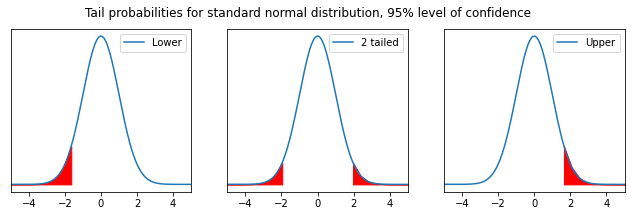

In [22]:
# Confidence levels and tails

fig = plt.figure(figsize=(11,3))     # Figure size is (width,height) in inches
_ = fig.suptitle('Tail probabilities for standard normal distribution, 95% level of confidence')

alpha = 0.05
areas = [alpha,alpha/2,1-alpha]
zc = stats.norm.ppf(areas)

xl = 10
x = np.linspace(-xl,xl,1000)     # Generates 100 evenly spaced numbers in the interval [-xl,xl]
xd ={'Lower':(-xl,zc[0]),'2 tailed':(-xl,zc[1],-zc[1],xl), 'Upper':(zc[2],xl)}

for i,key in enumerate(xd):
    ax = fig.add_subplot(1,3,i+1)
    _ = ax.axes.get_yaxis().set_visible(False)
    _ = ax.axes.set_xlim(-5,5)
    _ = ax.plot(x,stats.norm.pdf(x),label=key)
    _ = ax.legend(loc='upper right')
    
    x1 = np.linspace(xd[key][0],xd[key][1],20)
    _=ax.fill_between(x1,0,stats.norm.pdf(x1),color='r')
    if (key == "2 tailed"):
        x2 = np.linspace(xd[key][2],xd[key][3],20)
        _=ax.fill_between(x2,0,stats.norm.pdf(x2),color='r')

In [29]:
def decision_rule(alpha,p):
    if (p < alpha):
        decision = "Reject H0"
    else:
        decision = "Fail to reject H0"
    return(decision)

### Population mean

In [36]:
# Hypothesis testing for population mean

np.random.seed(12345)
n=10
x = stats.norm.rvs(size=n)  # Standard normal random variates
alpha = 0.05

xbar = np.mean(x)
s = np.std(x, ddof=1)    # ddof=1 uses (n-1) for the denominator, so gives us sample sd

mu = 0.0                # H0: mu = 0               
T =  (xbar-mu)/ (s/np.sqrt(n))    

# Lower-tailed test
pl = stats.t.cdf(T,n-1)
print("Lower-tailed test: ",T,pl,"   Decision: ", decision_rule(alpha,pl))

# Upper-tailed test
pu = 1-stats.t.cdf(T,n-1)
print("Upper-tailed test: ",T,pu,"    Decision: ", decision_rule(alpha,pu))

# Two-tailed test
p2 = 2*(min(pl,pu)) # Two-tailed test, so twice the tail probability. Note that degrees of freedom = n-1
print("Two-tailed test: ",T,p2,"    Decision: ", decision_rule(alpha,p2))

stats.ttest_1samp(x,0)     # Default behavior of ttest_1samp: H0: mu = 0, Ha: mu not equal to zero


Lower-tailed test:  1.8498368520005377 0.9513118788634078    Decision:  Fail to reject H0
Upper-tailed test:  1.8498368520005377 0.048688121136592155     Decision:  Reject H0
Two-tailed test:  1.8498368520005377 0.09737624227318431     Decision:  Fail to reject H0


Ttest_1sampResult(statistic=1.8498368520005373, pvalue=0.09737624227318435)

### Population variance

In [45]:
# Hypothesis testing for population variance

np.random.seed(12345)
n=10
x = stats.norm.rvs(size=n)  # Standard normal random variates
alpha = 0.05

xbar = np.mean(x)
s = np.std(x, ddof=1)    # ddof=1 uses (n-1) for the denominator, so gives us sample sd
print("Sample variance = ",s**2)

sigma = 0.6                        # H0
print("H0: sigma^2 = ",sigma**2)
print("Level of significance = ",alpha)b
print("Chi-squared distribution, ", n-1, "degrees of freedom\n")

X2 = (n-1)*(s**2)/(sigma**2)      # Test statistic

# Lower-tailed test
pl = stats.chi2.cdf(X2,n-1)
print("Lower-tailed test: ",X2,pl,"   Decision: ", decision_rule(alpha,pl))

# Upper-tailed test
pu = 1-stats.chi2.cdf(X2,n-1)
print("Upper-tailed test: ",X2,pu,"   Decision: ", decision_rule(alpha,pu))

# Two-tailed test
p2 = 2*(min(pl,pu))
print("Two-tailed test: ",X2,p2,"   Decision: ", decision_rule(alpha,p2))

Sample variance =  0.7155771977102666
H0: sigma^2 =  0.36
Level of significance =  0.05
Chi-squared distribution,  9 degrees of freedom

Lower-tailed test:  17.889429942756667 0.9635217652248893    Decision:  Fail to reject H0
Upper-tailed test:  17.889429942756667 0.036478234775110696    Decision:  Reject H0
Two-tailed test:  17.889429942756667 0.07295646955022139    Decision:  Fail to reject H0


### Population proportion

In [56]:
# Hypothesis testing for population proportion
n = 10
p = 0.3
c = int(n*p)        # Sample count of successes

pi = 0.1            # H0
alpha = 0.05
print("H0: pi = ",pi)
print("Significance level = ", alpha)
print("Sampling distribution: Binomial(n,pi) with n = ",n,"\n")
# Lower-tailed test

pl = stats.binom.cdf(c,n,pi)   # Prob (counts <= sample counts)
print("Lower-tailed test: ",c,pl,"   Decision: ", decision_rule(alpha,pl))

# Upper-tailed test

pu = 1-stats.binom.cdf(c,n,pi)   # Prob (counts >= sample counts)
print("Upper-tailed test: ",c,pu,"   Decision: ", decision_rule(alpha,pu))

H0: pi =  0.1
Significance level =  0.05
Sampling distribution: Binomial(n,pi) with n =  10 

Lower-tailed test:  3 0.9872048016    Decision:  Fail to reject H0
Upper-tailed test:  3 0.012795198399999985    Decision:  Reject H0
